## MNIST Digit Recognition using CNN - Asimple solution

### a) Load the data set and understand the data
Details of data @ http://yann.lecun.com/exdb/mnist/

MNIST: Modified National Institute of Standards and Technology database

In [1]:
# Import MNIST data set
from keras.datasets import mnist

# Download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
#?mnist.load_data


MNIST is a digts data set. It contains the images of 70,000 digits from 0 to 9.
- Total 70,000 images provided in the dataset, 
- 60,000 are given for training 
- 10,000 are given for testing.
- X_train and X_test will contain the train and test images
- y_train and y_test will contain the digits that those images represent.

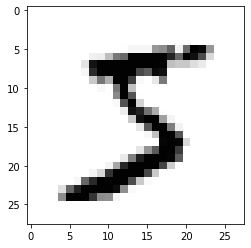

In [2]:
# Let us look at one image - We need matplotlib for visulaizing it
import matplotlib.pyplot as plt

# Plot first image from the data set

plt.imshow(X_train[0], cmap=plt.cm.Greys)

In [3]:
# What is the shape of each image? 
# Print the shape of first image from the train data set
# By default, the shape of every image in the mnist dataset is 28 x 28
X_train[0].shape

(28, 28)

In [4]:
# Get the dimensions of train and test data
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


### b) Prepare the data to fit into the shape required
Next, we need to reshape our dataset inputs (X_train and X_test) to the shape that our model expects when we train the model. The first number is the number of images (60,000 for X_train and 10,000 for X_test). Then comes the shape of each image (28x28). The last number is 1, which signifies that the images are greyscale.

In [5]:
# We reshape the training and test data sets to be a 4D tensor.
# Dimensions: num_images x 28 (h) x 28 (w) x 1 (d)
# The 1 is because we have a single channel (greyscale). 
# If RGB color images, we'd have 3 channels.

X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

input_shape = (28, 28, 1) # For one image

In [6]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

We need to ‘one-hot-encode’ our target variable. This means that a column will be created for each output category and a binary variable is inputted for each category. For example, we saw that the first image in the dataset is a 5. This means that the sixth number in our array will have a 1 and the rest of the array will be filled with 0.

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
# # We convert the class labels to binary class matrices
from keras.utils.np_utils import to_categorical

# # one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train[0] # Digit 5 - 0 0 0 0 0 1 0 0 0 0

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### c) Build the model using CNN - A simple CNN

- Sequential is the easiest way to build a model in Keras. It allows you to build a model layer by layer.

- We use the ‘add()’ function to add layers to our model.

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [10]:
# Create a empty model object
model = Sequential()

# Add model layers
# 
# 1. Add Convolution Layer
#      64 neurons in this layer
#      Filter size is 3x3
#      Activation function is 'relu'
#      Each image size is 28x28x1 

model.add(Conv2D(filters = 64, 
                 kernel_size=3, 
                 activation='relu', 
                 input_shape=(28,28,1) # one image shape
                )
         )

# 2. Add Maxpooling Layer
#      Pool size is 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3. Add fully connected layer, before that flatten the output 
# of maxpool 

# 10 neurons in the output layer, because each neuron represents
# one digit i.e. one class

# Softmax makes the output sum up to 1 so the output can 
# be interpreted as probabilities.

# Flattening transforms a two-dimensional matrix of features 
# into a vector that can be fed into a fully connected 
# neural network classifier.

model.add(Flatten()) 
model.add(Dense(10, activation='softmax'))

### c) Compiling the model
Compiling the model takes three parameters: 

- optimizer - The optimizer controls the learning rate. We will be using ‘adam’ as our optmizer. The learning rate determines how fast the optimal weights for the model are calculated. A smaller learning rate may lead to more accurate weights (up to a certain point), but the time it takes to compute the weights will be longer.

- loss - We will use ‘categorical_crossentropy’ for our loss function. This is the most common choice for classification. A lower score indicates that the model is performing better.

- metrics - To make things even easier to interpret, we will use the ‘accuracy’ metric to see the accuracy score on the validation set when we train the model.

In [11]:
# compile model using accuracy to measure model performance
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

### d) Training the model
To train, we will use the ‘fit()’ function on our model with the following parameters: training data (train_X), target data (train_y), validation data, and the number of epochs.

The number of epochs is the number of times the model will cycle through the data. The more epochs we run, the more the model will improve, up to a certain point. After that point, the model will stop improving during each epoch. For our model, we will set the number of epochs to 3.

In [12]:
#train the model
model.fit(X_train, 
          y_train, 
          validation_data=(X_test, y_test), 
          epochs=3)

Epoch 1/3
1875/1875 [==============================] - 39s 20ms/step - loss: 0.6276 - accuracy: 0.9448 - val_loss: 0.0977 - val_accuracy: 0.9733
Epoch 2/3
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0833 - accuracy: 0.9751 - val_loss: 0.0963 - val_accuracy: 0.9723
Epoch 3/3
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0688 - accuracy: 0.9784 - val_loss: 0.0960 - val_accuracy: 0.9760


### e) Using our model to make predictions


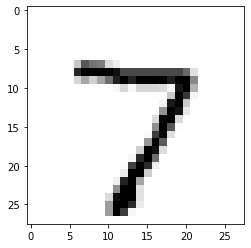

In [13]:
first_test_image = X_test[0, :]
plt.imshow(first_test_image.reshape(28, 28), cmap=plt.cm.Greys);

In [31]:
pred = model.predict(X_test[[0], :])

1/1 [==============================] - 0s 15ms/step


It has predicted it as 7 - Perfect...
CNN is very easy...

In [30]:
# Or you can get the max probability position, that will be the digit
import numpy as np
np.argmax(model.predict(X_test[[0], :]),axis=1)

1/1 [==============================] - 0s 17ms/step


array([7])